In [16]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from module_for_preprocessing import *  


with open('../config.yml', 'r') as file:
    config = yaml.safe_load(file)

size = config['données']['image']['size']



In [ ]:
testing = os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Testing")

x_test, y_test = load_images_with_preprocessing(testing, size)

In [15]:
base_dir = os.getcwd()
save_dir = os.path.join(base_dir,'..', 'src', 'models', 'sauvegardes_modeles')  # Remonter d'un niveau, aller dans 'src/models'
model_to_load = 'modele_brain_tumor_20241117_205951.h5'  # Remplace par le nom exact de ton modèle
model_path = os.path.join(save_dir, model_to_load)

model = load_model(model_path)

13/13 [==============================] - 38s 3s/step


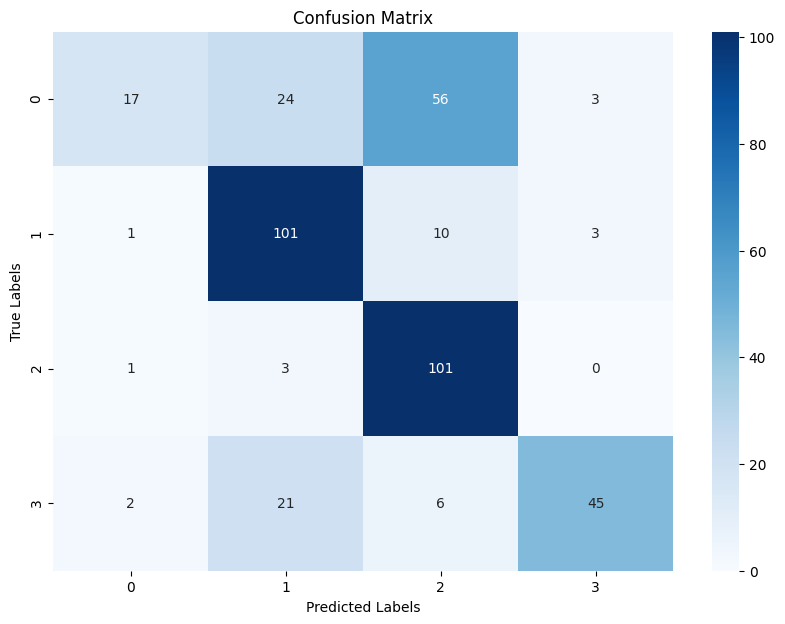

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.17      0.28       100
           1       0.68      0.88      0.77       115
           2       0.58      0.96      0.73       105
           3       0.88      0.61      0.72        74

    accuracy                           0.67       394
   macro avg       0.74      0.65      0.62       394
weighted avg       0.72      0.67      0.62       394



In [14]:

y_pred_proba = model.predict(x_test)  
y_pred = np.argmax(y_pred_proba, axis=1)  

if len(y_test.shape) > 1:  
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# 3. Créer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# 4. Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(np.unique(y_true))), yticklabels=range(len(np.unique(y_true))))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Afficher un rapport détaillé
print("Classification Report:")
print(classification_report(y_true, y_pred))
